# **Модуль А:** Анализ и предобработка данных

**Краткое описание задания:** в рамках данного модуля участникам необходимо подготовить набор данных для обучения дублирующей нейронной сети, а также ознакомится с предоставленными организаторами API.

## Импортирование библиотек

In [12]:
# библиотека
import json
import time

import requests
import base64

import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

In [2]:
class Text2ImageAPI:

    def __init__(self, url, api_key, secret_key):
        self.URL = url
        self.AUTH_HEADERS = {
            'X-Key': f'Key {api_key}',
            'X-Secret': f'Secret {secret_key}',
        }

    def get_model(self):
        response = requests.get(self.URL + 'key/api/v1/models', headers=self.AUTH_HEADERS)
        data = response.json()
        return data[0]['id']

    def generate(self, prompt, model, images=1, width=1024, height=1024):
        params = {
            "type": "GENERATE",
            "numImages": images,
            "width": width,
            "height": height,
            "generateParams": {
                "query": f"{prompt}"
            }
        }

        data = {
            'model_id': (None, model),
            'params': (None, json.dumps(params), 'application/json')
        }
        response = requests.post(self.URL + 'key/api/v1/text2image/run', headers=self.AUTH_HEADERS, files=data)
        data = response.json()
        return data['uuid']

    def check_generation(self, request_id, attempts=10, delay=10):
        while attempts > 0:
            response = requests.get(self.URL + 'key/api/v1/text2image/status/' + request_id, headers=self.AUTH_HEADERS)
            data = response.json()
            if data['status'] == 'DONE':
                return data['images']

            attempts -= 1
            time.sleep(delay)

In [15]:
# if __name__ == '__main__':
api = Text2ImageAPI('https://api-key.fusionbrain.ai/', 
                    '0D80B8472A5EBDD0F15559AC2DA484CD', 
                    'DA25C08E60913D0491B491AE694606B1')
model_id = api.get_model()
uuid = api.generate("Трехногий лабрадор черный старый в старой футболке", model_id)
image = api.check_generation(uuid)[0]



In [16]:
image_data = base64.b64decode(image)
img = Image.open(BytesIO(image_data))

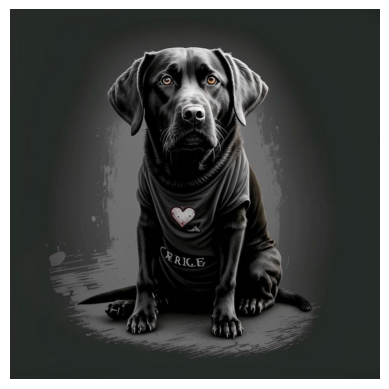

In [17]:
# Выводим в Matplotlib
plt.imshow(img)
plt.axis('off')  # Убираем оси
plt.show()

In [18]:
# Декодируем Base64 в бинарные данные
image_data = base64.b64decode(image)

# Сохраняем в файл
with open("output.jpg", "wb") as f:
    f.write(image_data)
print("Изображение сохранено как output.jpg")

Изображение сохранено как output.jpg
